In [0]:
# Import the useful libraries 
import numpy as np
import pandas as pd
import os
from random import randint
import matplotlib.pyplot as plt

In [2]:
# Define R Matrix 

R = np.matrix([[0, 0, np.nan, np.nan, 0, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
                [0, 0, 0, np.nan, 0, 0, np.nan, np.nan, np.nan, np.nan, np.nan],
                [np.nan, 0, 0, 0, np.nan, np.nan, 100, np.nan, np.nan, np.nan, np.nan],
                [np.nan, np.nan, 0, 0, np.nan, np.nan, 100, np.nan, np.nan, np.nan, np.nan],
                [0, 0, np.nan, np.nan, 0, 0, np.nan, np.nan, 0, 0, np.nan],
                [np.nan, 0, np.nan, np.nan, 0, 0, 100, 0, np.nan, np.nan, np.nan],
                [np.nan, np.nan, 0, 0, np.nan, 0, 100, 0, np.nan, np.nan, np.nan],
                [np.nan, np.nan, np.nan, np.nan, np.nan, 0, 100, 0, np.nan, np.nan, 0],
                [np.nan, np.nan, np.nan, np.nan, 0, np.nan, np.nan, np.nan, 0, 0, np.nan],
                [np.nan, np.nan, np.nan, np.nan, 0, np.nan, np.nan, np.nan, 0, 0, 0],
                [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 0, np.nan, 0, 0]])

print(R)

[[  0.   0.  nan  nan   0.  nan  nan  nan  nan  nan  nan]
 [  0.   0.   0.  nan   0.   0.  nan  nan  nan  nan  nan]
 [ nan   0.   0.   0.  nan  nan 100.  nan  nan  nan  nan]
 [ nan  nan   0.   0.  nan  nan 100.  nan  nan  nan  nan]
 [  0.   0.  nan  nan   0.   0.  nan  nan   0.   0.  nan]
 [ nan   0.  nan  nan   0.   0. 100.   0.  nan  nan  nan]
 [ nan  nan   0.   0.  nan   0. 100.   0.  nan  nan  nan]
 [ nan  nan  nan  nan  nan   0. 100.   0.  nan  nan   0.]
 [ nan  nan  nan  nan   0.  nan  nan  nan   0.   0.  nan]
 [ nan  nan  nan  nan   0.  nan  nan  nan   0.   0.   0.]
 [ nan  nan  nan  nan  nan  nan  nan   0.  nan   0.   0.]]


In [3]:
# Initialise Q Matrix 
Q = np.matrix(np.zeros([11,11]))

print(Q)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [0]:
# Define initial parameters 
alpha = 0.9 # alpha is the learning rate
gamma = 0.8 # gamma is the discount factor 
epsilon = 0.1 # epsilon is the exploration factor
decay = 0.95 # df is the decay factor for epsilon

In [0]:
def q_learning(alpha, gamma, epsilon, decay):
    
  # initialise current state in random
  current_state = randint(0, 10)
  
  # check available actions in the current state
  current_state_row = R[current_state,]
  av_act = np.where(current_state_row >= 0)[1]
  
  # randomly select the next action and record in steps
  next_action = int(np.random.choice(av_act,1))
  
  # epislon greedy policy
  if np.random.uniform(0, 1) > epsilon:
    one_step_ahead_q_value = np.max(Q[next_action, :])
  else:
    one_step_ahead_q_value = np.random.choice(np.array(Q[next_action,:]).ravel())
  
  # update Q-matrix
  Q[current_state, next_action] = Q[current_state, next_action] + alpha * (R[current_state, next_action] + gamma * one_step_ahead_q_value - Q[current_state, next_action])
  
  # update epsilon value
  epsilon *= decay
  
  # return Q-matrix and number of steps
  return Q

In [0]:
def evaluate(Q, episode):
  
  # initiate current state
  current_state = randint(0,10)
#   current_state = 8
  steps = [current_state]
  reward = 0
  
  # set rule if initiated from Station 7
  if current_state == 6:
    reward += np.max(Q[current_state, :])
  
  # step for start from other stations
  else:
    while current_state != 6:
      
      # check available actions, particular for early episode that Q value is 0 
      current_state_row = R[current_state, :]
      av_act = np.where(current_state_row >= 0)[1]
      
      # index for maximum value
      max_index = np.where(Q[current_state,:] == np.max(Q[current_state, av_act]))[1]
      
      if max_index.shape[0] > 1:
        next_step = int(np.random.choice(max_index, size = 1))
      else:
        next_step = int(max_index)
      
      # append next action and reward
      next_reward = np.max(Q[current_state, max_index])
      
      steps.append(next_step)
      reward += next_reward
      current_state = next_step
      
  
  average_reward.append((episode, reward/len(steps)))  
  step_cont.append((episode, len(steps)))
  
  return average_reward, step_cont

In [7]:
average_reward = []
step_cont = []

for episode in range(100):
  Q = q_learning(alpha, gamma, 0, 1)
#   Q = (Q/np.matrix.max(Q))*100
  average_reward, step_cont = evaluate(Q, episode)

print(Q)
# print(average_reward)
# print(step_cont)

[[  0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.        ]
 [  0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.        ]
 [  0.           0.         133.75233085   0.           0.
    0.         185.76712618   0.           0.           0.
    0.        ]
 [  0.           0.         144.98195312 140.42238938   0.
    0.         232.14669297   0.           0.           0.
    0.        ]
 [  0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.        ]
 [  0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.        ]
 [  0.           0.         145.0840406  174.33841894   0.
    0.         171.58831018 133.22310938   0.           0.
    0.        ]
 [  0.           0.           0.           0.           0.
   

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in greater_equal
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in greater_equal


In [8]:
df_reward = pd.DataFrame.from_records(average_reward, columns = ['Episodes', 'Average Reward Per Step'])
df_step = pd.DataFrame.from_records(step_cont, columns = ['Episodes','Steps'])

df = pd.merge(df_reward, df_step, on='Episodes')
df.head(5)

,Episodes,Average Reward Per Step,Steps
0,0,0.0,4
1,1,0.0,13
2,2,0.0,12
3,3,0.0,13
4,4,0.0,3


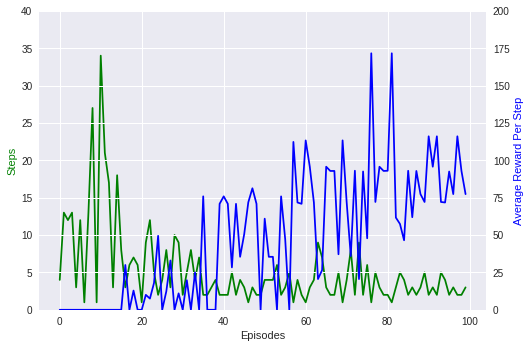

In [11]:
# plt.style.use('seaborn')

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(df['Episodes'], df['Steps'],'g-')
ax2.plot(df['Episodes'], df['Average Reward Per Step'], 'b-')

ax1.set_ylim(0, 40)
ax2.set_ylim(0, 200)

ax1.set_xlabel('Episodes')
ax1.set_ylabel('Steps', color='g')
ax2.set_ylabel('Average Reward Per Step', color='b')

plt.show()